In [1]:
import sys
import os
import xarray as xr
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import dask.array as da
from datetime import datetime, timedelta

In [76]:
os.chdir('/w2-data2/willytsai/test/')
files = glob('*nc4')
data = xr.open_mfdataset(files)
cwv = data.TQV

/home/willytsai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  This is separate from the ipykernel package so we can avoid doing imports until
/home/willytsai/anaconda3/lib/python3.6/site-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


In [82]:
cwv_mon = cwv.groupby('time.month').mean('time').compute()
cwv_amean = cwv_mon.mean(axis=(1,2))

(42, 50)

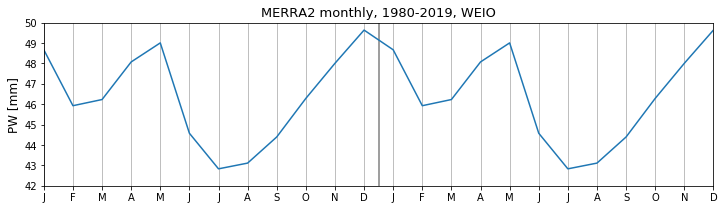

In [89]:
cwvplt = np.concatenate([cwv_amean,cwv_amean])
x = ['J','F','M','A','M','J','J','A','S','O','N','D',
     'J','F','M','A','M','J','J','A','S','O','N','D']

fig = plt.figure(figsize=(12,3))
plt.plot(cwvplt)
plt.xticks(np.linspace(0,23,24),x)
plt.title('MERRA2 monthly, 1980-2019, WEIO',fontsize=13)
plt.ylabel('PW [mm]',fontsize=12)
plt.grid(axis='x')
plt.vlines(x=11.5,ymin=40,ymax=50,color='grey')
plt.xlim([0,23]);plt.ylim([42,50])